<a href="https://colab.research.google.com/github/LaurieBetancourt/Aplicacion-Reconocimiento-Optico-Caracteres/blob/main/GoogleColab/Handwriting_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar datos y librerias

### Librerias

In [ ]:
# Libreria Tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
# Keras
import keras
print(keras.__version__)

2.6.0


In [ ]:
# modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 

In [ ]:
# Libreria OpenCv
import cv2 
print(cv2.__version__)
from google.colab.patches import cv2_imshow

4.1.2


In [ ]:
# libreria plot
import matplotlib.pyplot as plt
import matplotlib.image as img


In [ ]:
# libreria numpy
import numpy as np


In [ ]:
# tiempo
import time

In [ ]:
# drive
from google.colab import drive

## Base de Datos **MNIST**

In [ ]:
# Base de Datos MN
from keras.datasets import mnist
datos = keras.datasets.mnist

## Datos de entrenamiento y prueba

A continuación, se dividiran los datos del dataset **MNIST**. En una variable se guardaran datos para el entrenamiento del modelo y en otra los datos para probar el modelo. 

In [ ]:
(x_entrenamiento,y_entrenamiento),(x_prueba,y_prueba)= datos.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
## Entrenamiento
# 60,000 imagenes de tamaño 28x28
x_entrenamiento.shape

(60000, 28, 28)

In [ ]:
## Prueba
# 10,000 imagenes de tamaño 28x28
x_prueba.shape

(10000, 28, 28)

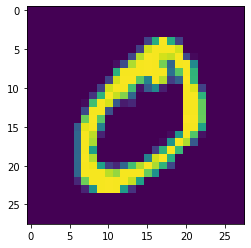

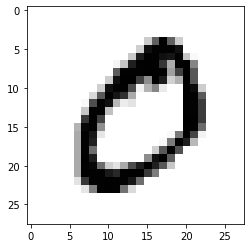

0


In [ ]:
# Visualización de un elemento de los datos de entrenamiento
# La imagen
plt.imshow(x_entrenamiento[1])
plt.show()
# La imagen en escala de grises
plt.imshow(x_entrenamiento[1], cmap=plt.cm.binary)
plt.show()
# El valor correspondiente a la imagen
print(y_entrenamiento[1])

Si imprimimos a `x_entrenamiento`, los valores que obtenemos son los valores del color de los pixeles de la imagen. 

In [ ]:
print(x_entrenamiento[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

# Preprocesamiento
## Normalización de los datos

Ahora, lo que necesitamos es transformar esos valores en valores correspondientes a los de una distribución normal. 

In [ ]:
x_entrenamiento = tf.keras.utils.normalize(x_entrenamiento, axis=1)
x_prueba=tf.keras.utils.normalize(x_prueba, axis=1)

### Despuésde normalizar los datos

Ahora los valores entan entre $0$ y $1$



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

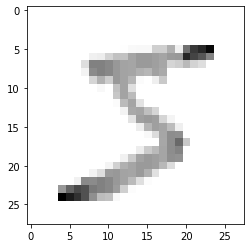

In [ ]:
print(x_entrenamiento[1])
plt.imshow(x_entrenamiento[0],cmap=plt.cm.binary)

## Redimencionar las imagenes

Usaremos la funcion `reshape` de **numpy**. Esta función devuelve un nuevo array. 

In [ ]:
### Tamaño imagen
# Entrenamiento
x_entrenamientoD = np.array(x_entrenamiento).reshape(-1,28,28,1)
x_pruebaD = np.array(x_prueba).reshape(-1,28,28,1)


In [ ]:

print(x_pruebaD[1])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

# Modelo

- `Conv2D` [INFO](https://keras.io/api/layers/convolution_layers/convolution2d/)
- `Activation` [INFO](https://keras.io/api/layers/activations/)
  - *relu*: Applies the rectified linear unit activation function
  - *softmax*: Converts a vector of values to a probability distribution
- `MaxPooling2D`[INFO](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
-`Flatten` [INFO](https://keras.io/api/layers/reshaping_layers/flatten/)
- `Dense` [INFO](https://keras.io/api/layers/core_layers/dense/)
- `compile()` [INFO](https://keras.io/api/optimizers/)

In [ ]:
modelo = keras.models.Sequential()

#### Primera Capa
# filtro
modelo.add(keras.layers.Conv2D(64,kernel_size=(3,3),input_shape = x_entrenamientoD.shape[1:]))
# funcion de activacion
modelo.add(keras.layers.Activation("relu"))
# Valor maximo de una matriz 2x2
modelo.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#### Segunda Capa
# filtro
modelo.add(keras.layers.Conv2D(64,(3,3)))
# funcion de activacion
modelo.add(keras.layers.Activation("relu"))
# Valor maximo de una matriz 2x2
modelo.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#### Tercera Capa
# filtro
modelo.add(keras.layers.Conv2D(64,(3,3)))
# funcion de activacion
modelo.add(keras.layers.Activation("relu"))
# Valor maximo de una matriz 2x2
modelo.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(64))
modelo.add(Activation("relu"))

modelo.add(Dense(32))
modelo.add(Activation("relu"))

modelo.add(Dense(10))
modelo.add(Activation("softmax"))


In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [ ]:
modelo.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
Tinicio = time.time()

ModEv = modelo.fit(x_entrenamientoD,y_entrenamiento,validation_data=(x_pruebaD,y_prueba) ,epochs=100, batch_size=128,validation_split=0.3)

Tfin = time.time()

Epoch 1/100
329/329 [==============================] - 60s 183ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0538 - val_accuracy: 0.9877
Epoch 2/100
329/329 [==============================] - 61s 184ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0573 - val_accuracy: 0.9876
Epoch 3/100
329/329 [==============================] - 61s 184ms/step - loss: 8.3059e-04 - accuracy: 0.9999 - val_loss: 0.0587 - val_accuracy: 0.9875
Epoch 4/100
329/329 [==============================] - 61s 184ms/step - loss: 5.8225e-04 - accuracy: 1.0000 - val_loss: 0.0603 - val_accuracy: 0.9882
Epoch 5/100
329/329 [==============================] - 60s 184ms/step - loss: 3.5690e-04 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9877
Epoch 6/100
329/329 [==============================] - 61s 185ms/step - loss: 2.2184e-04 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 0.9881
Epoch 7/100
329/329 [==============================] - 61s 185ms/step - loss: 1.4361e-04 - accuracy: 1.0000 

In [ ]:
print("Tiempo de entrenamiento del modelo: ",(Tfin-Tinicio)/60, "Minutos")

Tiempo de entrenamiento del modelo:  102.36870189905167 Minutos


# Probar modelo




## Predicción del modelo

Para analizar de una mejor manera la eficiencia del modelo, usaremos las $10,000$ imágenes que reservamos de nuestro set de datos original. 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
### Predicciones
predicciones_modelo = modelo.predict([x_pruebaD])
print(predicciones_modelo)

[[0.00000000e+00 1.84177895e-32 4.46207697e-35 ... 1.00000000e+00
  0.00000000e+00 1.12270158e-30]
 [3.80969961e-24 6.40188550e-33 1.00000000e+00 ... 0.00000000e+00
  6.20374338e-31 1.04646284e-34]
 [1.01073736e-32 1.00000000e+00 4.44854765e-28 ... 1.66720157e-30
  1.29627300e-33 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.46985408e-38
  2.78807217e-34 3.44996513e-32]
 [7.08246490e-31 9.89770560e-34 0.00000000e+00 ... 8.72319280e-37
  2.64822570e-27 3.40283741e-37]
 [1.87447480e-26 8.49178398e-30 1.20191788e-29 ... 0.00000000e+00
  1.70134164e-24 0.00000000e+00]]


In [ ]:
print(modelo.evaluate(x_pruebaD,y_prueba))

313/313 [==============================] - 4s 14ms/step - loss: 0.1714 - accuracy: 0.9882
[0.17144224047660828, 0.9882000088691711]


In [ ]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_entrenamiento)
y_test = label_binarizer.fit_transform(y_prueba)

#Imprimir classification_report
print(classification_report(y_prueba,predicciones_modelo.argmax(axis=1),target_names=[str(x) for x in label_binarizer.classes_]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print(predicciones_modelo[y_entrenamiento])

[[2.0034716e-07 9.9998450e-01 4.0464738e-06 ... 4.6610839e-06
  3.8446155e-06 5.1802175e-07]
 [9.7448826e-08 1.2825855e-06 4.4184662e-06 ... 9.9994814e-01
  1.6596779e-08 3.4378198e-05]
 [9.7686620e-07 1.7125096e-09 8.6986165e-07 ... 9.0899360e-10
  8.9187091e-07 4.9942053e-05]
 ...
 [2.0034716e-07 9.9998450e-01 4.0464738e-06 ... 4.6610839e-06
  3.8446155e-06 5.1802175e-07]
 [6.7566461e-08 1.2548030e-08 2.8281104e-07 ... 5.9857058e-07
  3.2018434e-05 2.5993532e-03]
 [3.9626784e-03 1.6551196e-05 7.6261073e-05 ... 4.2706656e-06
  6.5356426e-02 2.0872499e-04]]


In [ ]:
print(predicciones_modelo.argmax)

### Resultados

Al evaluar el modelo obtenemos como resultado un precición del $98.1100\%$

In [ ]:
plt.style.use('ggplot')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
valores_epoch = list(ModEv.epoch)

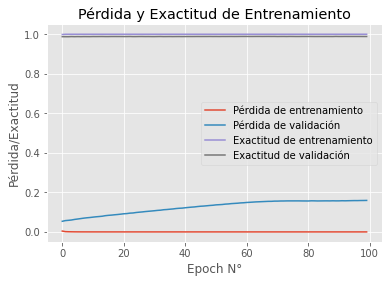

In [ ]:
plt.style.use('ggplot')
plt.figure()
plt.plot(valores_epoch,ModEv.history['loss'], label='Pérdida de entrenamiento')
plt.plot(valores_epoch,ModEv.history['val_loss'], label='Pérdida de validación')
plt.plot(valores_epoch,ModEv.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(valores_epoch,ModEv.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
#plt.suptitle('Datos de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()